# Check hyperspectral data

### Extract compressed data

In [2]:
import tarfile
import os

# Specify the path to the .tar.gz file
tar_gz_file = '../../data/AV320230915t202107rfl.tar.gz'

# Specify the directory where you want to extract the files
extract_dir = '../../data/AV320230915t202107rfl'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Open the .tar.gz file
with tarfile.open(tar_gz_file, 'r:gz') as tar:
    # Extract all files
    tar.extractall(path=extract_dir)

print(f"Files extracted to {extract_dir}")


Files extracted to ../../data/AV320230915t202107rfl


### Open HDR file

In [42]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt

In [9]:
file_path = '../../data/AV320230915t202107rfl/AV320230915t202107_L2A_OE_main_98b13fff_RFL_ORT.hdr'
hdr = sp.envi.open(file_path)
wvl = hdr.bands.centers
rows, cols, bands = hdr.nrows, hdr.ncols, hdr.nbands
meta = hdr.metadata

In [17]:
meta.keys()

dict_keys(['description', 'samples', 'lines', 'bands', 'header offset', 'file type', 'data type', 'interleave', 'byte order', 'map info', 'wavelength units', 'wavelength', 'fwhm', 'band names', 'masked pixel noise', 'bbl', 'data ignore value'])

In [13]:
img = hdr.load()

### Find bare soil pixels

In [30]:
# Find the index of the closest wavelength in the available wavelengths

b8_s2 = 842
closest_index = np.argmin(np.abs(np.array(wvl)- b8_s2))
nir = img[:, :, closest_index]

b4_s2 = 665
closest_index = np.argmin(np.abs(np.array(wvl)- b4_s2))
r = img[:, :, closest_index]

swir1_s2 = 1610
closest_index = np.argmin(np.abs(np.array(wvl)- swir1_s2))
swir1 = img[:, :, closest_index]

swir2_s2 = 2190 
closest_index = np.argmin(np.abs(np.array(wvl)- swir2_s2))
swir2 = img[:, :, closest_index]

In [69]:
# Find pixels satisfying these conditions
ndvi = (nir - r) / (nir + r)
nbr2 = (swir1 - swir2) / (swir1 + swir2)
bare_condition = (0 < ndvi) & (ndvi <= 0.25) & (nbr2 <= 0.075)
non_bare_condition = ~((0 < ndvi) & (ndvi <= 0.25) & (nbr2 <= 0.075))

missing = np.any(img == -9999, axis=2)
missing = missing.reshape(missing.shape[0], missing.shape[1], 1)

### Plot bare soil spectra

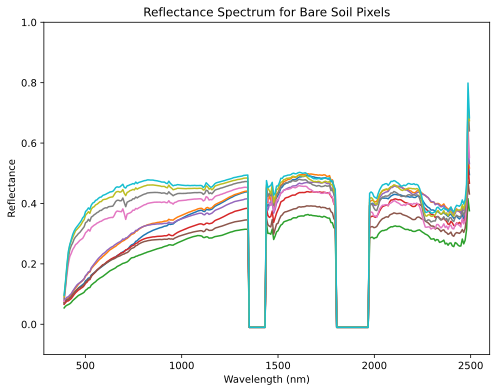

In [99]:
bare_pixels_indices = np.column_stack(np.where(bare_condition))

# Take the first 10 pixels that satisfy the condition (you can modify this based on your needs)
num_samples = 10
chosen_pixel_indices = bare_pixels_indices[:num_samples]

# Extract reflectance values for the chosen pixels
reflectances = img[chosen_pixel_indices[:, 0], chosen_pixel_indices[:, 1], :]

# Plot the reflectances for each chosen pixel
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

for i in range(num_samples):
    plt.plot(wvl, reflectances[i, :].flatten(), label=f'Pixel {i + 1}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Reflectance Spectrum for Bare Soil Pixels')
plt.ylim((-0.1,1))
plt.show()

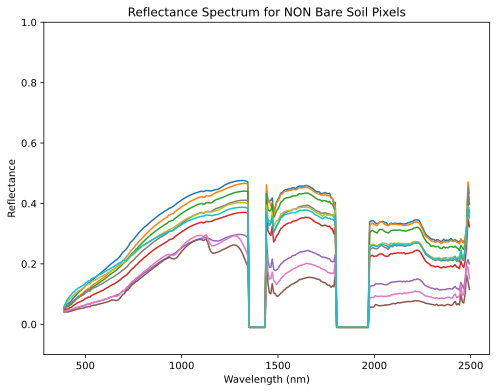

In [103]:
nonbare_pixels_indices = np.column_stack(np.where(non_bare_condition & ~missing))
#nonbare_pixels_indices = np.column_stack(np.where(ndvi>0.6))

# Take the first 10 pixels that satisfy the condition (you can modify this based on your needs)
num_samples = 10
chosen_pixel_indices = nonbare_pixels_indices[:num_samples]

# Extract reflectance values for the chosen pixels
reflectances = img[chosen_pixel_indices[:, 0], chosen_pixel_indices[:, 1], :]

# Plot the reflectances for each chosen pixel
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

for i in range(num_samples):
    plt.plot(wvl, reflectances[i, :].flatten(), label=f'Pixel {i + 1}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Reflectance Spectrum for NON Bare Soil Pixels')
plt.ylim((-0.1,1))
plt.show()

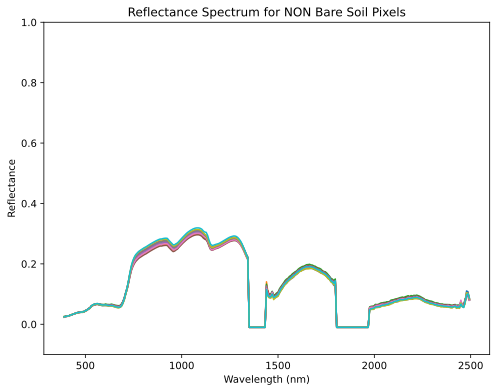

In [104]:
#nonbare_pixels_indices = np.column_stack(np.where(non_bare_condition & ~missing))
nonbare_pixels_indices = np.column_stack(np.where(ndvi>0.6))

# Take the first 10 pixels that satisfy the condition (you can modify this based on your needs)
num_samples = 10
chosen_pixel_indices = nonbare_pixels_indices[:num_samples]

# Extract reflectance values for the chosen pixels
reflectances = img[chosen_pixel_indices[:, 0], chosen_pixel_indices[:, 1], :]

# Plot the reflectances for each chosen pixel
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

for i in range(num_samples):
    plt.plot(wvl, reflectances[i, :].flatten(), label=f'Pixel {i + 1}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Reflectance Spectrum for NON Bare Soil Pixels')
plt.ylim((-0.1,1))
plt.show()